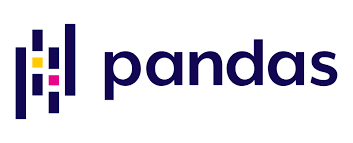

## [29] Random Sampling pada Data Frame

### [29.1] Import Module

In [2]:
import pandas as pd
print (pd.__version__)

1.0.5


### [29.2] Persiapan Data Frame 
- Data Frame akan terdiri dari dua kolom yaitu 'col_1' dan 'col_2'
- col_1 akan berisikan data [1,2,3,4,5]
- col_2 akan berisikan data [10,20,30,40,50]

In [3]:
d = {'col_1':[1,2,3,4,5],
    'col_2':[10,20,30,40,50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


### [29.3] Random sampling with/without replacement
- Parameter replace dengan nilai False mengindikasikan kita melakukan sampling tanpa replacement, artinya data-data yang sudah disampling dari population tidak akan disampling lagi.
- Parameter replace dengan nilai True mengindikasikan kita melakukan sampling dengan replacement, artinya data-data yang sudah disampling dari population akan disampling lagi.

In [4]:
df.sample(n=4,replace=False,random_state=0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [5]:
df.sample(n=4,replace=True,random_state=0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


## [30] Akses nilai variabel pada query()

### [30.1] Import Module

In [6]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [30.2]Persiapan Data Frame

In [7]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
df

,A,B,C,D,E
0,3,15,13,1,9
1,9,1,6,7,16
2,16,11,9,13,14
3,11,11,4,7,19
4,17,6,17,17,17


### [30.3] Akses nilai variabel pada query()
- Tahap 1 yaitu menyeleksi data dengan nilai pada kolom A > 5
- Tahap 2 yaitu menghitung nilai rata-rata atau mean pada kolom A
- Tahap 3 yaitu menyeleksi data dengan nilai pada kolom A > mean

In [8]:
df.query('A>5')

,A,B,C,D,E
1,9,1,6,7,16
2,16,11,9,13,14
3,11,11,4,7,19
4,17,6,17,17,17


In [9]:
rerata = df['A'].mean()
rerata

11.2

In [10]:
df.query('A>@rerata')

,A,B,C,D,E
2,16,11,9,13,14
4,17,6,17,17,17


## [31] Mengenal tipe data ordinal pada Pandas
- Terdapat dua tipe data pada tipe data kategori : tipe data kardinal dan tipe data ordinal
- Tipe data nominal merupakan tipe data yang murni berperan sebagai label
- Tipe data ordinal merupakn tipe data yang memiliki tingkatan

### [31.1] Import Module

In [1]:
import pandas as pd
print(pd.__version__)

1.0.5


### [31.2] Persiapan Data Frame
- Kolom kepuasan merupakan contoh tipe data ordinal dimana terdapat tingkatan antara bai, buruk, dan cukup

In [11]:
d = {'pelanggan':[11,12,13,14],
    'kepuasan':['baik','cukup','buruk','cukup']
}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


### [31.3] Tipe Data Ordinal pada Pandas
- Untuk mengspesifikasikan tipe data ordinal pada Pandas diperlukan CategoricalDtype

In [16]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk','cukup','baik','sangat baik'],ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [17]:
df = df.sort_values('kepuasan',ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [18]:
df[df['kepuasan']>'cukup']

,pelanggan,kepuasan
0,11,baik


## [32] Plotting dari Pandas Data Frame

### [32.1] Import Module

In [19]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### [32.2] Persiapan Data Frame
- Membentuk data frame berukuran 40 baris dan 5 kolom
- Angka dari isi data frame merupakan angka random yang di-generate dari 1-20
- df.head() akan menampilkan 5 baris pertama dari data frame

In [20]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


### [32.3] Line Plot
- Nilai pada sumbu X akan berasosiasi dengan index
- Nilai pada sumbu Y akan berasosiasi dengan nilai pada Data Frame

In [21]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


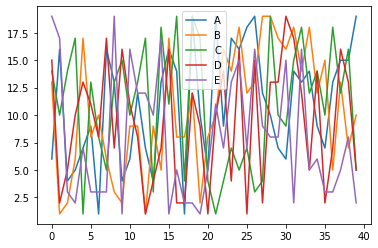

In [22]:
df.plot(kind='line')

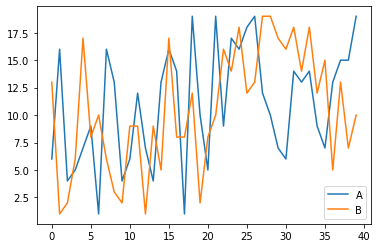

In [23]:
df[['A','B']].plot(kind='line')

### [32.4] Bar Plot
- Untuk melakukan plotting bar plot pada data frame dapat dilakukan dengan pemanggilan parameter kind = bar pada fungsi plot
- Parameter barh akan mengubah hasil plottingan menjadi horizontal

In [24]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


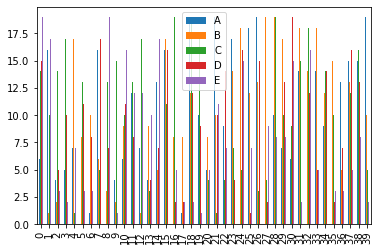

In [25]:
df.plot(kind='bar')

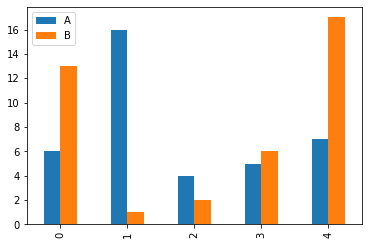

In [29]:
df[['A','B']].head().plot(kind='bar')

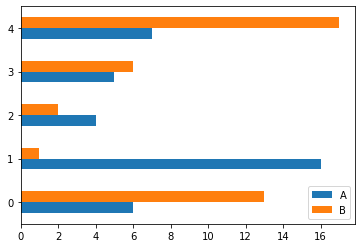

In [30]:
df[['A','B']].head().plot(kind='barh')

### [32.5] Area Plot

In [31]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


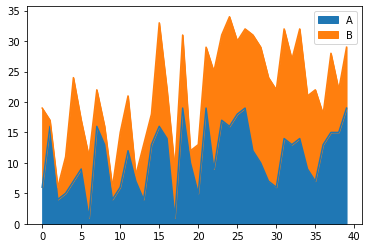

In [32]:
df[['A','B']].plot(kind='area')

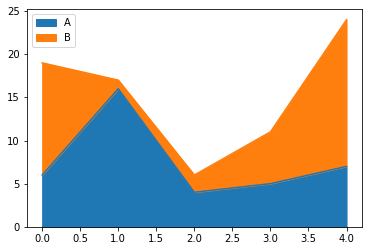

In [34]:
df[['A','B']].head().plot(kind='area')

### [32.6] Box Plot

In [35]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


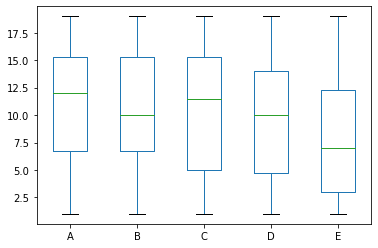

In [36]:
df.plot(kind='box')

### [32.6] Histogram

In [37]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


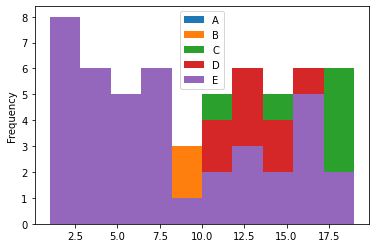

In [38]:
df.plot(kind='hist')

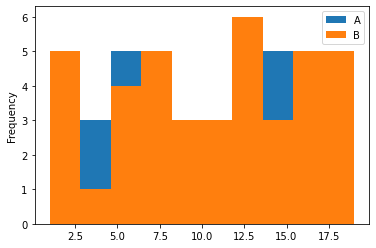

In [39]:
df[['A','B']].plot(kind='hist')

### [32.7] Kernel Density Estimation (KDE)

In [40]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


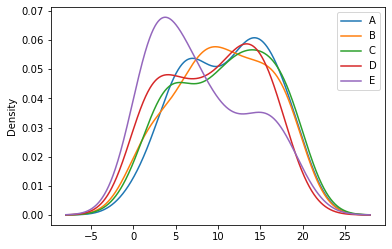

In [42]:
df.plot(kind='kde')

### [32.8] Scatter Plot

In [43]:
df.head()

,A,B,C,D,E
0,6,13,14,15,19
1,16,1,10,2,17
2,4,2,14,5,3
3,5,6,17,10,2
4,7,17,1,13,7


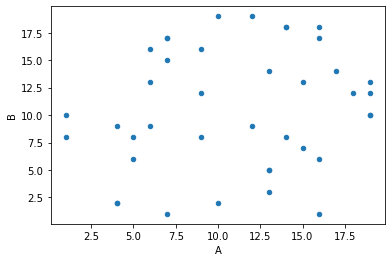

In [44]:
df.plot(x='A',y='B',kind='scatter')